In [ ]:
pip install librosa soundfile pyaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PyAudio-0.2.12.tar.gz (42 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio which use PEP 517 and cannot be installed directly


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import soundfile

In [ ]:
from IPython.display import Audio

In [ ]:
data = "/content/drive/MyDrive/RAVDESS/"

In [ ]:
dir_list = os.listdir(data)
file_emotions = []
file_path = []
for dir in dir_list:
    directories = os.listdir(data + '/' + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotions.append(int(part[2]))
        file_path.append(data + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotions, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
ravdess_df.head()

,Emotions,Path
0,2,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
1,2,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
2,1,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
3,2,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
4,1,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...


In [ ]:
emotions={
  1:'neutral',
  2:'calm',
  3:'happy',
  4:'sad',
  5:'angry',
  6:'fearful',
  7:'disgust',
  8:'surprised'
}
ravdess_df.Emotions.replace(emotions, inplace = True )
print(emotions)

{1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'}


In [ ]:
ravdess_df.head()

,Emotions,Path
0,calm,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
1,calm,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
2,neutral,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
3,calm,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
4,neutral,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...


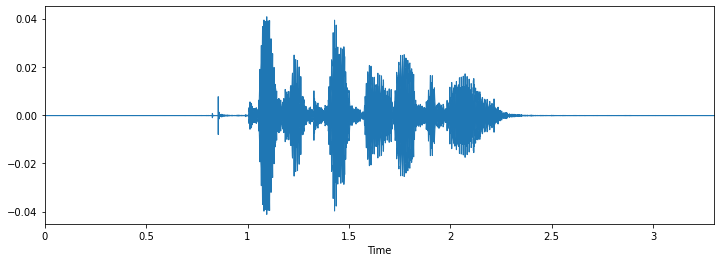

In [ ]:
from librosa import display

df, sr = librosa.load('/content/drive/MyDrive/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(df, sr)

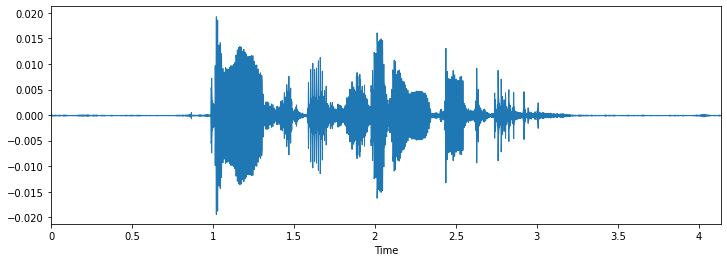

In [ ]:
df1, sr1 = librosa.load('/content/drive/MyDrive/RAVDESS/Actor_05/03-01-02-01-02-01-05.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(df1, sr1)

In [ ]:
#changing file format

dataset = pd.concat([ravdess_df])
dataset.to_csv("dataset.csv",index = False)
dataset.head()

,Emotions,Path
0,calm,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
1,calm,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
2,neutral,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
3,calm,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...
4,neutral,/content/drive/MyDrive/RAVDESS/Actor_21/03-01-...


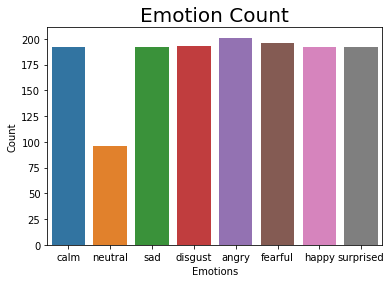

In [ ]:
plt.title("Emotion Count", size = 20)
sns.countplot(x = 'Emotions', data = dataset)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()

Waveplot of different functions

In [ ]:
def cr_waveplot(dt, sample, e):
  plt.figure(figsize= (10,5))
  plt.title('Waveplot for {} emotion'.format(e), size = 13)
  librosa.display.waveplot(dt, sr = sample)
  plt.show()

Path =  /content/drive/MyDrive/RAVDESS/Actor_21/03-01-05-01-02-01-21.wav


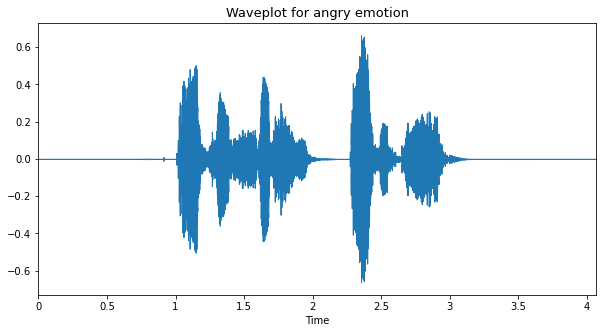

In [ ]:
emotion = 'angry'
path = np.array(dataset.Path[dataset.Emotions == emotion])[7] 
print("Path = " , path)
data , sampling = librosa.load(path)
cr_waveplot(data, sampling, emotion)
Audio(path)

Path =  /content/drive/MyDrive/RAVDESS/Actor_21/03-01-02-02-02-02-21.wav


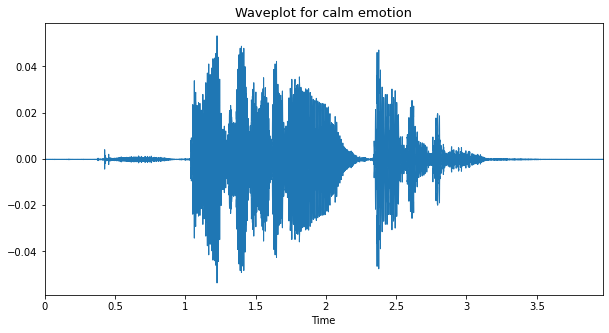

In [ ]:
emotion = 'calm'
path = np.array(dataset.Path[dataset.Emotions == emotion])[7] 
print("Path = " , path)
data , sampling = librosa.load(path)
cr_waveplot(data, sampling, emotion)
Audio(path)

Path =  /content/drive/MyDrive/RAVDESS/Actor_17/03-01-01-01-02-02-17.wav


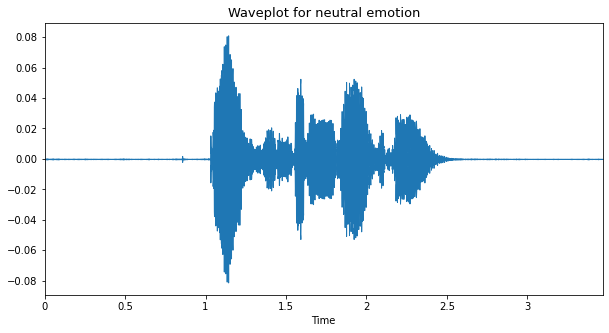

In [ ]:
emotion = 'neutral'
path = np.array(dataset.Path[dataset.Emotions == emotion])[7] 
print("Path = " , path)
data , sampling = librosa.load(path)
cr_waveplot(data, sampling, emotion)
Audio(path)

Path =  /content/drive/MyDrive/RAVDESS/Actor_21/03-01-04-01-02-02-21.wav


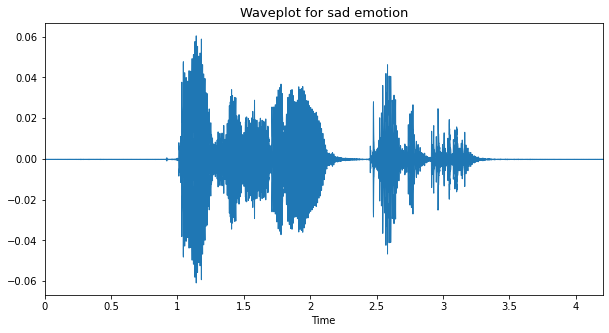

In [ ]:
emotion = 'sad'
path = np.array(dataset.Path[dataset.Emotions == emotion])[7] 
print("Path = " , path)
data , sampling = librosa.load(path)
cr_waveplot(data, sampling, emotion)
Audio(path)

Path =  /content/drive/MyDrive/RAVDESS/Actor_21/03-01-03-02-02-01-21.wav


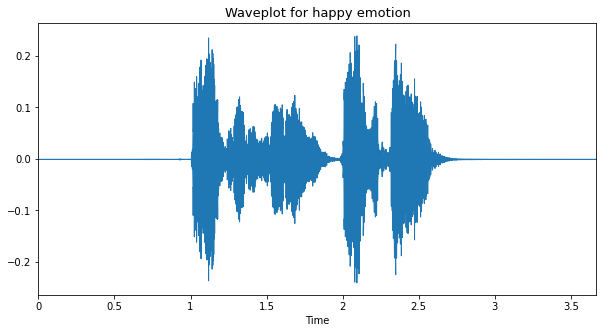

In [ ]:
emotion = 'happy'
path = np.array(dataset.Path[dataset.Emotions == emotion])[7] 
print("Path = " , path)
data , sampling = librosa.load(path)
cr_waveplot(data, sampling, emotion)
Audio(path)

In [ ]:
path = '/content/drive/MyDrive/RAVDESS'
lst = []

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        file = file[17:19]
        arr = mfccs, file
        lst.append(arr)
      except ValueError:
        continue    

In [ ]:
X, y = zip(*lst)

In [ ]:
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((1454, 40), (1454,))

**Train-Test** **Split**

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.20, random_state=7)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_X, train_Y)
dt_predict = dt.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(test_Y, dt_predict)
print("Accuracy of Decision Tree model :" , accuracy_dt*100)

Accuracy of Decision Tree model : 71.8213058419244


**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-07, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=700)
mlp.fit(train_X, train_Y)
mlp_predict = mlp.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_mlp = accuracy_score(test_Y, mlp_predict)
print("Accuracy of MLPClassifier model :" , accuracy_mlp*100)

Accuracy of MLPClassifier model : 86.25429553264605
